In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Charger le dataset
iris = load_iris()
X = iris.data  # Caractéristiques (features)
y = iris.target  # Variable cible (target)

# Convertir en DataFrame pour une meilleure visualisation
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                      columns=iris['feature_names'] + ['target'])
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  

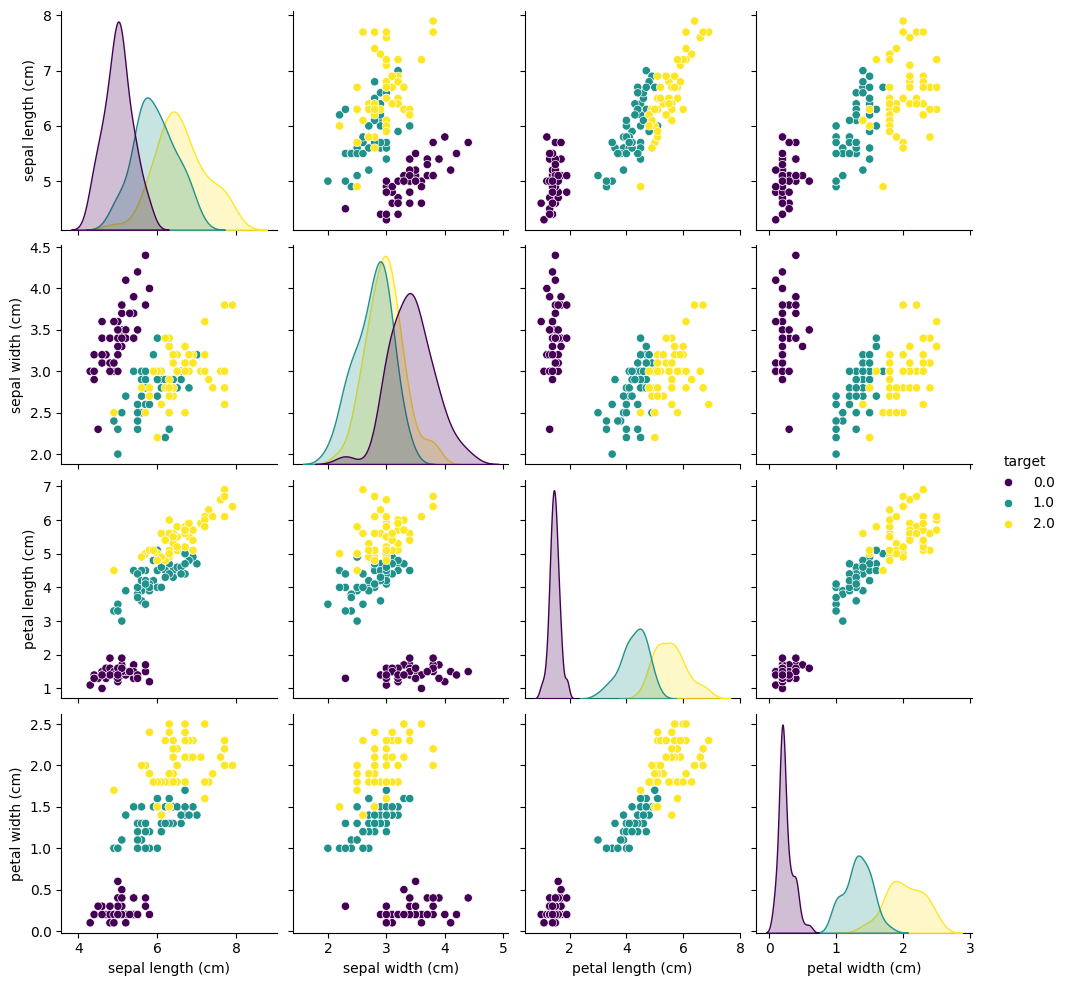

In [ ]:
# Aperçu des premières lignes
print(iris_df.head())

# Statistiques descriptives
print(iris_df.describe())

# Visualisation des données
sns.pairplot(iris_df, hue='target', palette='viridis')
plt.show()

In [ ]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Création du modèle KNN
knn = KNeighborsClassifier(n_neighbors=2)

# Entraînement du modèle
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
# Prédictions sur l'ensemble de test
y_pred = knn.predict(X_test)

# Matrice de confusion
print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred))

# Rapport de classification
print("\nRapport de classification:")
print(classification_report(y_test, y_pred))

# Score de précision
print("\nPrécision du modèle:", accuracy_score(y_test, y_pred))

Matrice de confusion:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Rapport de classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Précision du modèle: 1.0


In [ ]:
# Exemple de prédiction
new_sample = [[5.1, 3.5, 1.4, 0.2]]  # Données normalisées
new_sample = scaler.transform(new_sample)
prediction = knn.predict(new_sample)

print("\nPrédiction pour le nouvel échantillon:", iris.target_names[prediction][0])


Prédiction pour le nouvel échantillon: setosa


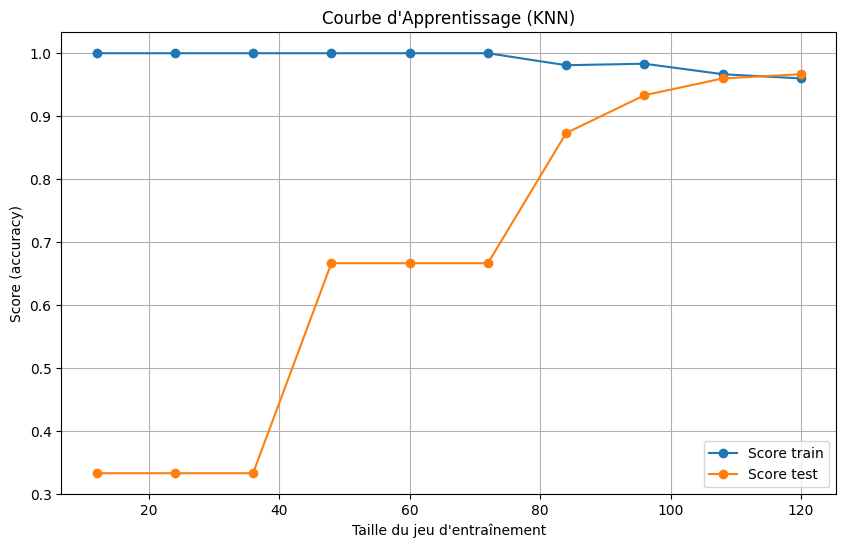

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Fonction pour tracer la courbe d'apprentissage
def plot_learning_curve(estimator, title, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=np.linspace(0.1, 1.0, 10))

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Score train")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Score test")
    plt.title(title)
    plt.xlabel("Taille du jeu d'entraînement")
    plt.ylabel("Score (accuracy)")
    plt.legend()
    plt.grid()
    plt.show()

# Tracer la courbe pour KNN
plot_learning_curve(KNeighborsClassifier(n_neighbors=3),
                    "Courbe d'Apprentissage (KNN)", X, y)

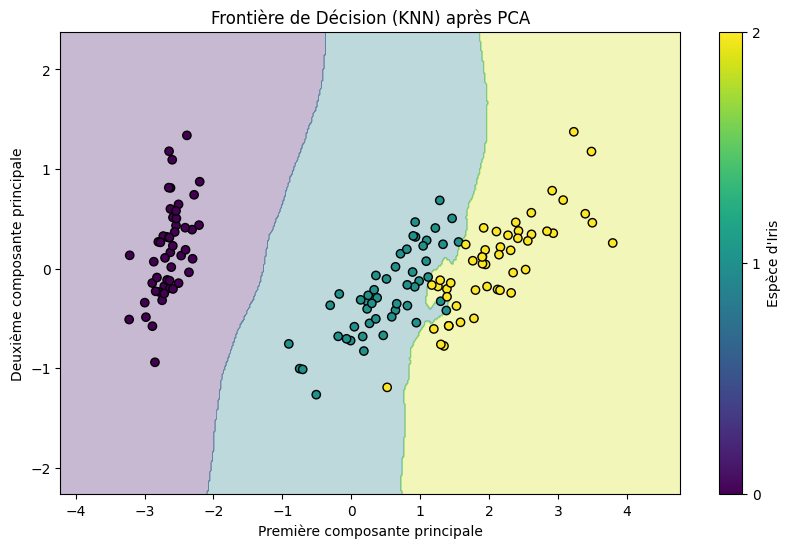

In [ ]:
from sklearn.decomposition import PCA

# Réduction à 2D avec PCA (car on ne peut pas afficher 4D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Entraînement du KNN sur les 2 composantes principales
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_pca, y)

# Création d'une grille pour la visualisation
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Affichage
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("Frontière de Décision (KNN) après PCA")
plt.xlabel("Première composante principale")
plt.ylabel("Deuxième composante principale")
plt.colorbar(ticks=[0, 1, 2], label='Espèce d\'Iris')
plt.show()